<a href="https://colab.research.google.com/github/DeekshaaGatty/HandWrittenDigitPrediction/blob/main/Handwritten_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#__Hand Written Digit Prediction - Classification Analysis__

##_Objective: To train a Random Forest Classifier to classify images of handwritten digits from 0 to 9_

##_Data Source:  "Digits" dataset from scikit-learn (sklearn)_

###Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###Import Data

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
df = load_digits()

###Describe Data

>Dataset Size:
>>Number of images:


In [ ]:
len(df.images)

1797

>>Image dimensions:

In [ ]:
df.images[0].shape

(8, 8)

>Label Information:
>>Number of classes:

In [ ]:
len(df.target_names)

10

>>Class distribution:

In [ ]:
{class_label: sum(df.target == class_label) for class_label in df.target_names}

{0: 178,
 1: 182,
 2: 177,
 3: 183,
 4: 181,
 5: 182,
 6: 181,
 7: 179,
 8: 174,
 9: 180}

>Pixel Value Range:
>>Minimum pixel value:

In [ ]:
df.images.min()

0.0

>>Maximum pixel value:

In [ ]:
df.images.max()

16.0

###Data Visualization

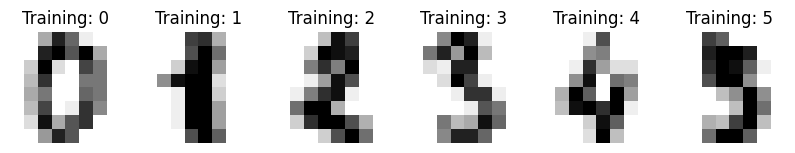

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=6,figsize=(10,3))
for ax, image,label in zip(axes, df.images,df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i"%label)

###Data Preprocessing

In [ ]:
n_samples = len(df.images)
data = df.images.reshape((n_samples,-1))

In [ ]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data[0].shape

(64,)

In [ ]:
data.shape

(1797, 64)

>Scaling Image Data

In [ ]:
data.min()

0.0

In [ ]:
data.max()

16.0

In [ ]:
data = data/16

In [ ]:
data.min()

0.0

In [ ]:
data.max()

1.0

In [ ]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

###Define Target Variable (y) and Feature Variables (X)

In [ ]:
X=data

In [ ]:
y = df.target

###Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

###Modeling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

###Prediction

In [ ]:
y_pred=rf.predict(x_test)
y_pred

array([9, 0, 8, 5, 6, 8, 4, 0, 0, 5, 0, 1, 3, 7, 9, 2, 0, 1, 5, 1, 7, 5,
       3, 5, 5, 5, 4, 2, 5, 2, 0, 0, 9, 0, 2, 4, 6, 3, 9, 5, 4, 6, 8, 3,
       2, 9, 4, 4, 6, 7, 6, 6, 7, 8, 2, 9, 7, 8, 7, 4, 1, 1, 9, 3, 9, 4,
       4, 5, 6, 9, 6, 6, 2, 8, 8, 3, 4, 3, 8, 3, 0, 7, 9, 2, 1, 0, 7, 4,
       9, 5, 8, 2, 5, 3, 4, 0, 7, 2, 6, 1, 0, 4, 8, 1, 8, 7, 6, 5, 8, 5,
       3, 7, 5, 0, 4, 0, 5, 7, 5, 9, 7, 9, 5, 3, 4, 5, 2, 8, 2, 5, 2, 4,
       7, 4, 9, 8, 7, 9, 0, 0, 0, 8, 1, 5, 1, 1, 4, 8, 9, 1, 3, 9, 0, 7,
       0, 9, 1, 3, 2, 0, 4, 2, 7, 8, 1, 6, 0, 3, 1, 2, 1, 1, 9, 3, 6, 8,
       9, 0, 1, 7, 7, 4, 3, 2, 5, 9, 3, 9, 4, 1, 0, 0, 8, 6, 9, 8, 2, 1,
       5, 0, 4, 5, 6, 8, 8, 7, 8, 3, 7, 9, 0, 2, 3, 4, 2, 2, 3, 3, 9, 4,
       1, 6, 8, 8, 7, 9, 4, 1, 1, 7, 3, 3, 5, 0, 4, 9, 6, 3, 3, 7, 7, 1,
       3, 3, 3, 7, 7, 2, 9, 2, 9, 5, 0, 8, 3, 2, 0, 2, 1, 9, 9, 8, 1, 7,
       6, 5, 0, 1, 9, 1, 5, 5, 5, 7, 1, 6, 5, 4, 3, 9, 4, 6, 5, 3, 4, 5,
       1, 4, 6, 2, 6, 1, 0, 1, 2, 1, 1, 2, 9, 7, 6,

###Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test,y_pred)

array([[58,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 58,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 52,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 47,  0,  0,  0,  1,  3,  0],
       [ 0,  0,  0,  0, 51,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  1, 49,  0,  0,  0,  1],
       [ 1,  0,  0,  0,  0,  1, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 49,  1,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1, 52,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  2, 55]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        59
           1       0.98      1.00      0.99        58
           2       1.00      1.00      1.00        52
           3       1.00      0.90      0.95        52
           4       0.96      0.98      0.97        52
           5       0.96      0.96      0.96        51
           6       1.00      0.96      0.98        53
           7       0.94      0.98      0.96        50
           8       0.88      0.96      0.92        54
           9       0.98      0.93      0.96        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

